 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [2]:
import pandas as pd
import numpy as np
import gc
import warnings
from scipy.stats import kurtosis, skew, gmean, mode
import matplotlib.pyplot as plt;
import seaborn as sns
import plotly.express as px

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [4]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.EDA ( Exploratory Data Analysis)</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A1.Reading Data</p>

In [ ]:
train.tail()

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A2.Data Size</p>

In [ ]:
train.shape

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A3.Data Types</p>

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ GB


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A4.Summary Statistics</p>

In [ ]:
train.describe()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Data Pre-processing</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B1.Missing Values</p>

In [6]:
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
test.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B2.Remove Duplicates and Unnecessary Columns</p>

In [8]:
print(f"There are {sum(train.duplicated())} duplicated rows in the train data frame.")

There are 0 duplicated rows in the train data frame.


In [9]:
print(f"There are {sum(train.duplicated())} duplicated rows in the train data frame.")

print("\n")
print(f"After dropping the Response column, there are {sum(train.drop(columns=['Response']).duplicated())} duplicated rows in the train data frame.")

print("\n")
print(f"There are {sum(test.duplicated())} duplicated rows in the test data frame.")

There are 0 duplicated rows in the train data frame.


After dropping the Response column, there are 0 duplicated rows in the train data frame.


There are 0 duplicated rows in the test data frame.


Finally, we check if there are any observations that appear in both the `train` and `test` data frames.

In [10]:
temp_train = train.drop(columns=['Response'], axis=1)
temp_test = test

inner_join = pd.merge(temp_train, temp_test)
print(f"There are {inner_join.shape[0]} observations that appear in both the train and test data frames")

There are 0 observations that appear in both the train and test data frames


In [11]:
inner_join

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B3.Feature Distribution</p>

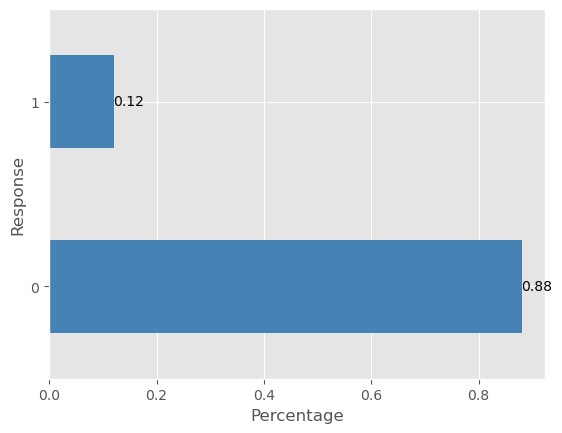

In [12]:
ax = round(train['Response'].value_counts(normalize=True), 2).plot(kind='barh', color='steelblue')
ax.bar_label(ax.containers[0], label_type='edge')
ax.margins(y=0.1)
plt.xlabel('Percentage');

From the above chart, we see that this is an imbalanced dataset. `Response = 1` is the less frequent label. Next, we explore the relationships between the input features and `Response`.

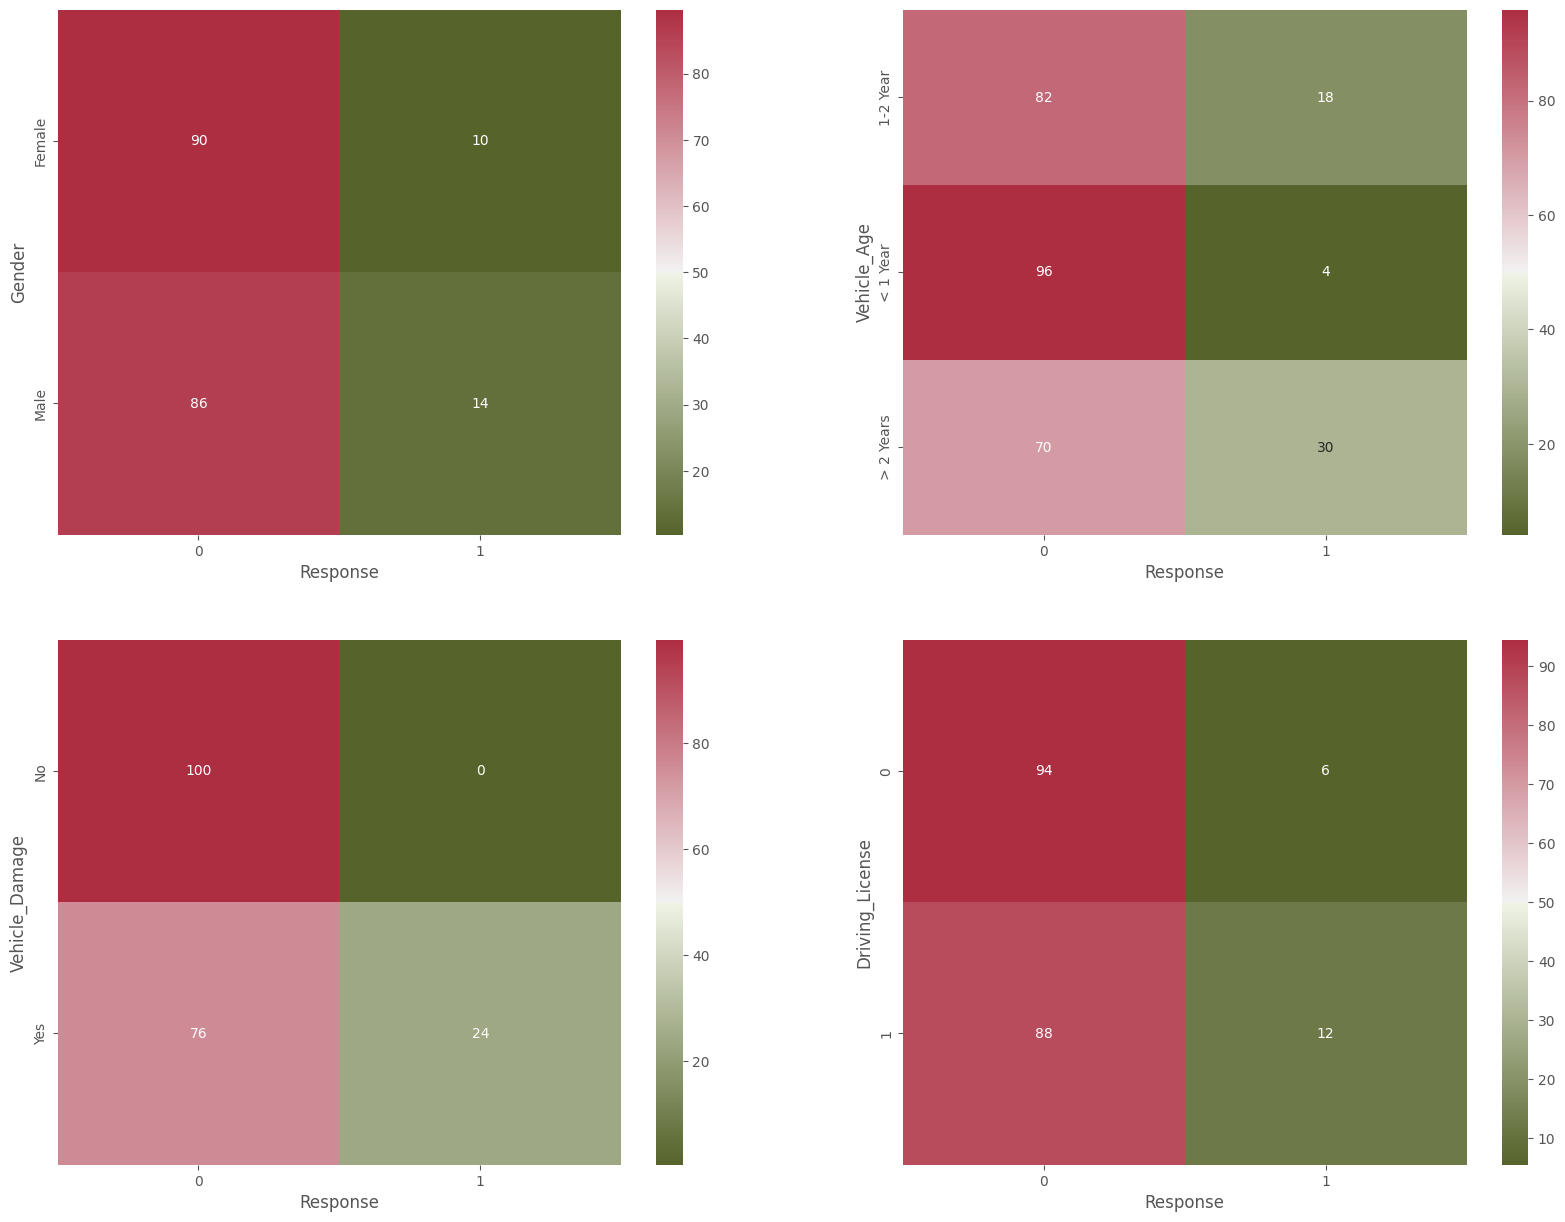

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 5, center = 'light', as_cmap = True)

sns.heatmap(data=round(100*pd.crosstab(train['Gender'], train['Response'], normalize=0), 2), annot=True, cmap=cmap, fmt='.0f', ax=axes[0, 0])
sns.heatmap(data=round(100*pd.crosstab(train['Vehicle_Age'], train['Response'], normalize=0), 2), annot=True, cmap=cmap, fmt='.0f', ax=axes[0, 1])
sns.heatmap(data=round(100*pd.crosstab(train['Vehicle_Damage'], train['Response'], normalize=0), 2), annot=True, cmap=cmap, fmt='.0f', ax=axes[1, 0]);
sns.heatmap(data=round(100*pd.crosstab(train['Driving_License'], train['Response'], normalize=0), 2), annot=True, cmap=cmap, fmt='.0f', ax=axes[1, 1]);

These are a couple of observations from the above charts:

- Males a litle more likely to have `Response = 1` than females.
- The older the car is, the more likely `Response = 1` is.

It seems that `Region_Code`, `Policy_Sales_Channel`, `Vintage` are categorical features. Let's check of the vales in each of those features are consistent across the `train` and `test` datasets.

In [10]:
print(f"There are {sum(~np.isin(test['Region_Code'].unique(), train['Region_Code'].unique()))} labels in Region_Code in the test dataset that don't appear in the train dataset.")
print(f"There are {sum(~np.isin(test['Policy_Sales_Channel'].unique(), train['Policy_Sales_Channel'].unique()))} labels in Policy_Sales_Channel in the test dataset that don't appear in the train dataset.")
print(f"There are {sum(~np.isin(test['Vintage'].unique(), train['Vintage'].unique()))} labels in Vintage in the test dataset that don't appear in the train dataset.")

There are 0 labels in Region_Code in the test dataset that don't appear in the train dataset.
There are 2 labels in Policy_Sales_Channel in the test dataset that don't appear in the train dataset.
There are 0 labels in Vintage in the test dataset that don't appear in the train dataset.


Let's identify those `Policy_Sales_Channel` labels in the `test` dataset that don't appear in the `train` dataset.

In [11]:
test['Policy_Sales_Channel'].unique()[~np.isin(test['Policy_Sales_Channel'].unique(), train['Policy_Sales_Channel'].unique())]

array([149., 144.])

Let's replace those labels as follows.

In [12]:
test['Policy_Sales_Channel'] = np.where(test['Policy_Sales_Channel']==144., 145., test['Policy_Sales_Channel'])
test['Policy_Sales_Channel'] = np.where(test['Policy_Sales_Channel']==149., 150., test['Policy_Sales_Channel'])

Next, we explore the distribution of `Age`.

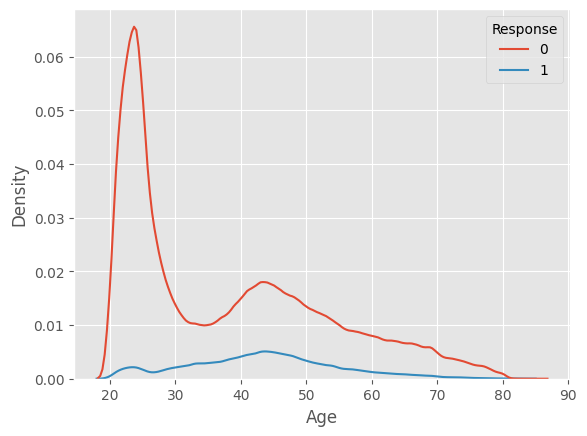

In [13]:
sns.kdeplot(data=train, x='Age', hue='Response');

From the above chart, the distributions of `Age` are similar. Next, we explore the distribution of `Annual_Premium`.

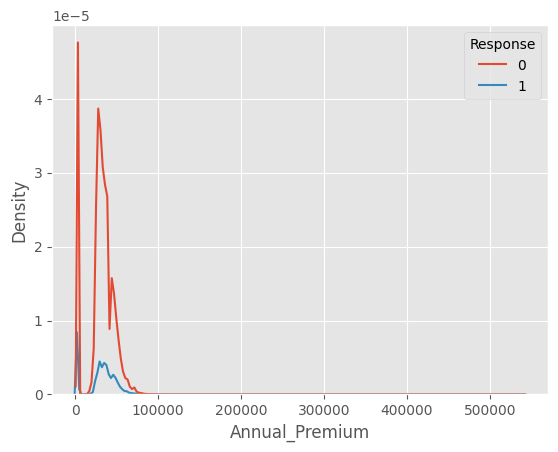

In [14]:
sns.kdeplot(data=train, x='Annual_Premium', hue='Response');

From the above chart, the distributions of `Annual_Premium` are similar.

In [38]:
gc.collect()

1717

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B4.Convert Types (Downcasting)</p>

In [13]:
%%time
def converting_datatypes(df, df_train=False):
    
    df = df.copy()

    df['Age'] = df['Age'].astype('int8')
    df['Driving_License'] = df['Driving_License'].astype('int8')
    df['Region_Code'] = df['Region_Code'].astype('int8')
    df['Previously_Insured'] = df['Previously_Insured'].astype('int8')
    df['Annual_Premium'] = df['Annual_Premium'].astype('int32')
    df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype('int16')
    df['Vintage'] = df['Vintage'].astype('int16')
    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1}).astype('int8')
    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 3}).astype('int8')
    df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'No': 0, 'Yes': 1}).astype('int8')

    if df_train==True:

        df['Response'] = df['Response'].astype('int8')

    return df

train = pd.read_csv('train.csv', index_col=0)
train = converting_datatypes(train, df_train=True)

CPU times: total: 7.8 s
Wall time: 7.8 s


### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, PowerTransformer, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, cross_val_predict, RepeatedKFold
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, cohen_kappa_score, log_loss, f1_score, r2_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, RidgeCV
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC, LinearSVR

from category_encoders import TargetEncoder
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.neural_network import MLPClassifier
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error

In [14]:
%%time
X = train.drop(columns=['Response'], axis=1)
Y = train['Response']

CPU times: total: 156 ms
Wall time: 152 ms


In [23]:
from  sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,Y, test_size = 0.3, random_state=42)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

In [15]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A1.LogisticRegression</p>

In [29]:
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
prediction_2  = model_2.predict(X_valid)

print(f'MAE: {mean_absolute_error(prediction_2, y_valid)}')
print(f'Train model score: {model_2.score(X_train, y_train)}')
print(f'Valid model score: {model_2.score(X_valid, y_valid)}')


MAE: 0.1292240340263774
Train model score: 0.8707731607113455
Valid model score: 0.8707759659736226


In [31]:
Cross_moj_2 = cross_val_score(model_2, X_train, y_train, cv=skf, scoring='roc_auc', n_jobs=-1)

In [32]:
print(Cross_moj_2)
print(f"The 10-fold average oof ROC-AUC score of the Logistic Regression model is {Cross_moj_2.mean()}")
print(f"The 10-fold std oof ROC-AUC score of the Logistic Regression model is {Cross_moj_2.std()}")

[0.81374984 0.61568927        nan 0.64357372        nan 0.64832318
        nan 0.61399305        nan        nan]
The 10-fold average oof ROC-AUC score of the Logistic Regression model is nan
The 10-fold std oof ROC-AUC score of the Logistic Regression model is nan


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A1. LogisticRegression - Model Evaluation</p>

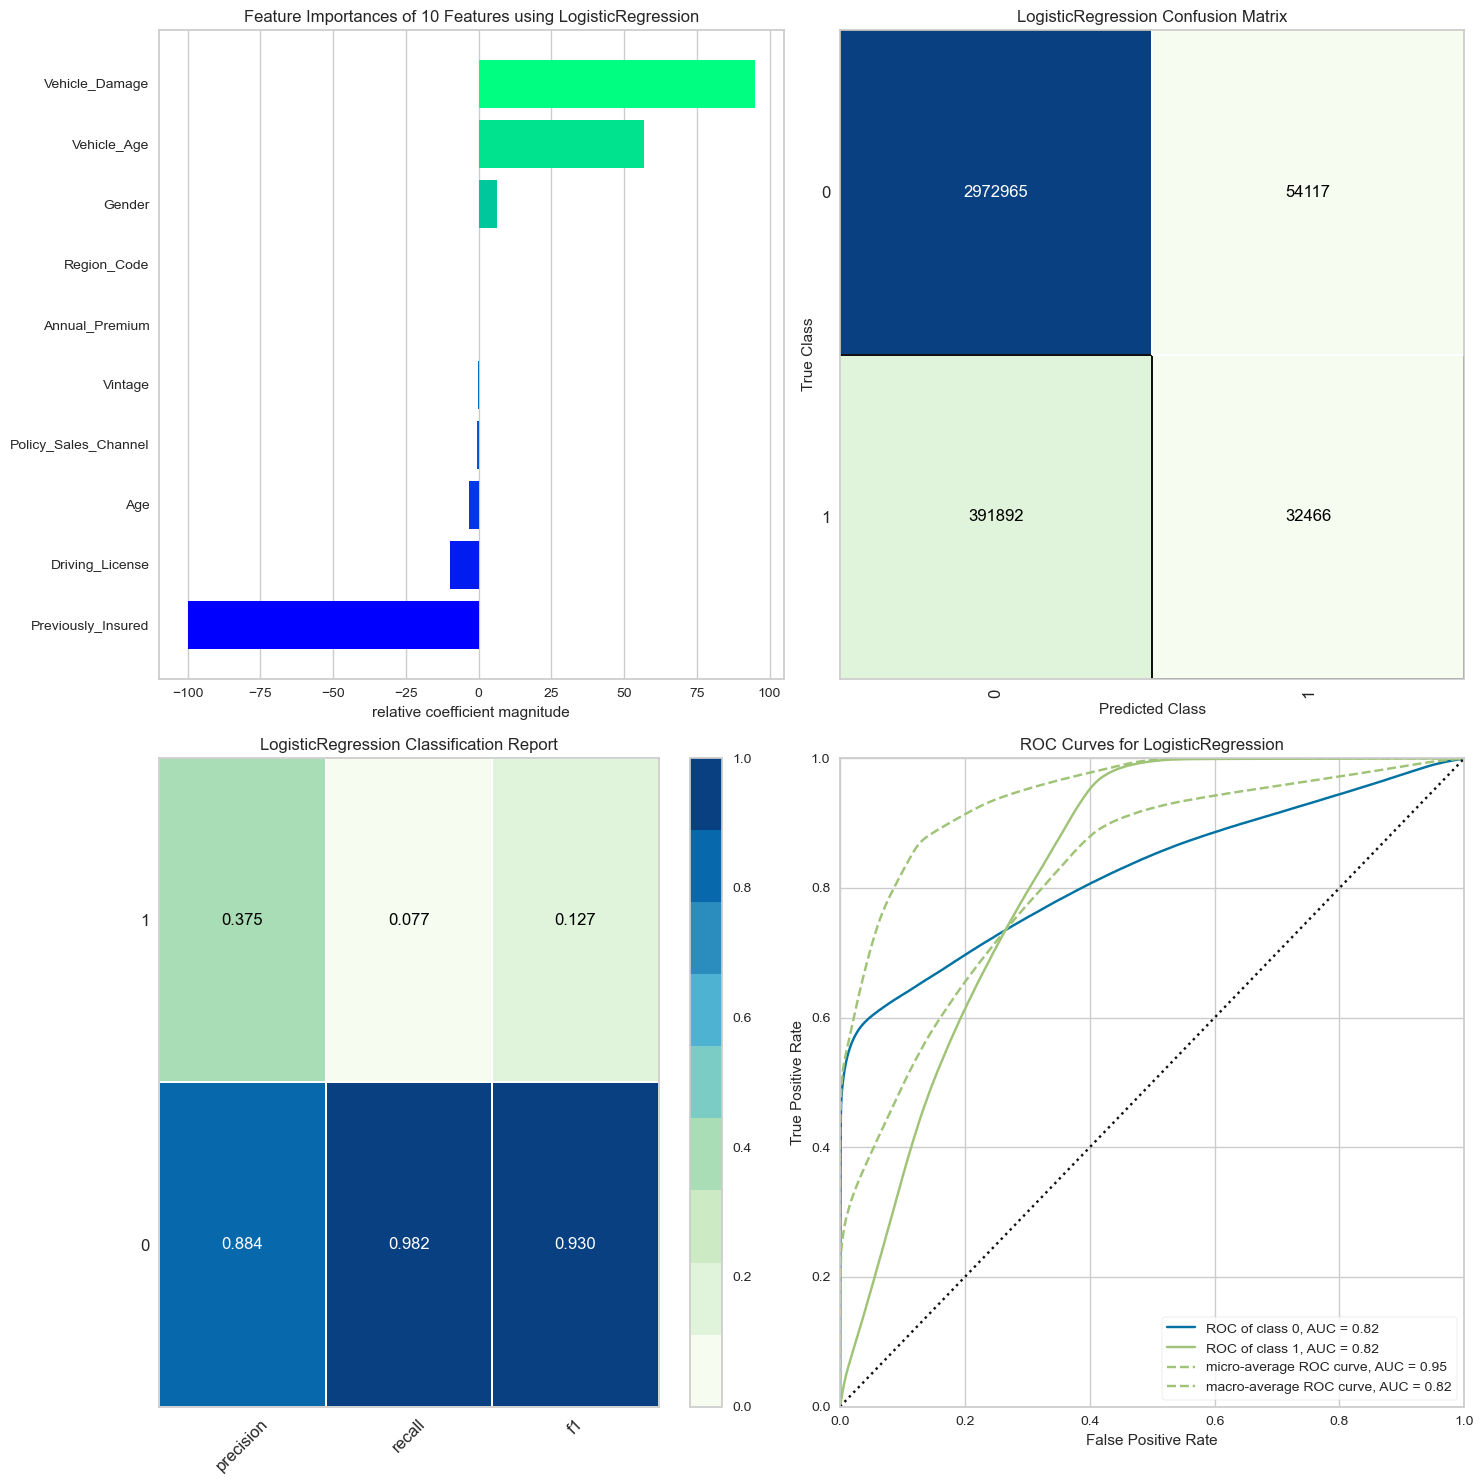

In [35]:
from yellowbrick.features import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, DiscriminationThreshold

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

model = model
model.importance_type = 'total_gain'

visualgrid = [
    FeatureImportances(model,  ax=axes[0][0], colormap= 'winter'),
    ConfusionMatrix(model, ax=axes[0][1], cmap= 'GnBu'),
    ClassificationReport(model, ax=axes[1][0], cmap= 'GnBu'),
    ROCAUC(model, ax=axes[1][1]),
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_valid, y_valid)
    viz.finalize()

plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A2.LogisticRegression</p>

In [37]:
%%time
def converting_datatypes(df, df_train=False):
    
    df = df.copy()
    
    if df_train==False:
        
        df['Policy_Sales_Channel'] = np.where(df['Policy_Sales_Channel']==144., 145., df['Policy_Sales_Channel'])
        df['Policy_Sales_Channel'] = np.where(df['Policy_Sales_Channel']==149., 150., df['Policy_Sales_Channel'])

    keys = np.sort(df['Region_Code'].unique()).tolist()
    values = [i for i in keys]
    region_code_dictionary = {}
    for key, value in zip(keys, values):
        region_code_dictionary[key] = 'code_' + str(value)

    keys = np.sort(df['Policy_Sales_Channel'].unique()).tolist()
    values = [i for i in keys]
    sales_channel_dictionary = {}
    for key, value in zip(keys, values):
        sales_channel_dictionary[key] = 'code_' + str(value)
    
    df['Age'] = df['Age'].astype('int8')
    df['Driving_License'] = df['Driving_License'].astype('int8')
    df['Region_Code'] = df['Region_Code'].map(region_code_dictionary).astype('category')
    df['Previously_Insured'] = df['Previously_Insured'].astype('int8')
    df['Annual_Premium'] = df['Annual_Premium'].astype('int32')
    df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].map(sales_channel_dictionary).astype('category')
    df['Vintage'] = df['Vintage'].astype('int16')
    df['Gender'] = df['Gender'].astype('category')
    df['Vehicle_Age'] = df['Vehicle_Age'].astype('category')
    df['Vehicle_Damage'] = df['Vehicle_Damage'].astype('category')

    if df_train==True:

        df['Response'] = df['Response'].astype('int8')

    return df

train = pd.read_csv('train.csv', index_col=0)
train = converting_datatypes(train, df_train=True)

X = train.drop(columns=['Response'], axis=1)
Y = train['Response']

step_1 = ColumnTransformer([('stand', StandardScaler(), ['Age', 'Annual_Premium', 'Vintage'])],
                            remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

step_2 = ColumnTransformer([('poly', PolynomialFeatures(include_bias=False),
                            ['Age', 'Annual_Premium', 'Vintage'])],
                            remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

step_3 = ColumnTransformer([('target_encoder', TargetEncoder(smoothing=30), ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 
                                                                             'Region_Code', 'Policy_Sales_Channel'])],
                            remainder='passthrough').set_output(transform='pandas')

feature_trans = Pipeline([('step-1', step_1),
                          ('step-2', step_2),
                          ('step-3', step_3)])

LR_md = Pipeline([('transformations', feature_trans),
                  ('LR', LogisticRegression(C=0.1,
                                            solver='newton-cholesky'))])

LR_cv = cross_val_score(LR_md, X, Y, cv=skf, scoring='roc_auc', n_jobs=-1)

print(f"The 10-fold average oof ROC-AUC score of the Logistic Regression model is {LR_cv.mean()}")
print(f"The 10-fold std oof ROC-AUC score of the Logistic Regression model is {LR_cv.std()}")

The 10-fold average oof ROC-AUC score of the Logistic Regression model is nan
The 10-fold std oof ROC-AUC score of the Logistic Regression model is nan
CPU times: total: 11.9 s
Wall time: 51.2 s


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A3.XGBClassififer</p>

In [40]:
%%time
def converting_datatypes(df, df_train=False):
    
    df = df.copy()
    
    if df_train==False:
        
        df['Policy_Sales_Channel'] = np.where(df['Policy_Sales_Channel']==144., 145., df['Policy_Sales_Channel'])
        df['Policy_Sales_Channel'] = np.where(df['Policy_Sales_Channel']==149., 150., df['Policy_Sales_Channel'])
    
    df['Age'] = df['Age'].astype('int8')
    df['Driving_License'] = df['Driving_License'].astype('int8')
    df['Region_Code'] = df['Region_Code'].astype('int8')
    df['Previously_Insured'] = df['Previously_Insured'].astype('int8')
    df['Annual_Premium'] = df['Annual_Premium'].astype('int32')
    df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype('int16')
    df['Vintage'] = df['Vintage'].astype('int16')

    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
    df['Gender'] = df['Gender'].astype('int8')

    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, 
                                               '1-2 Year': 1,
                                               '> 2 Years': 3})
    df['Vehicle_Age'] = df['Vehicle_Age'].astype('int8')

    df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'No': 0, 'Yes': 1})
    df['Vehicle_Damage'] = df['Vehicle_Damage'].astype('int8')

    if df_train==True:

        df['Response'] = df['Response'].astype('int8')

    return df

train = pd.read_csv('train.csv', index_col=0)
train = converting_datatypes(train, df_train=True)

test = pd.read_csv('test.csv', index_col=0)
test = converting_datatypes(test, df_train=False)

X = train.drop(columns=['Response'], axis=1)
Y = train['Response']

CPU times: total: 13.1 s
Wall time: 13.2 s


In [41]:
%%time
params = {'device': 'cuda',
          'max_depth': 15, 
          'learning_rate': 0.05685820957612027, 
          'gamma': 0.03555294130911486, 
          'alpha': 3.08060204795093, 
          'min_child_weight': 83, 
          'max_bin': 10000, 
          'colsample_bytree': 0.948672654438626, 
          'subsample': 0.7661213515695401, 
          'n_jobs': -1}

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
scores, test_preds = list(), list()
for i, (train_index, test_index) in enumerate(skf.split(X, Y)):
    
    print(f"------------ Working on Fold {i} ------------")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y.iloc[test_index]
            
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)
    dtest = xgb.DMatrix(test)
            
    xgb_md = xgb.train(params, dtrain, num_boost_round=500, evals=[(dvalid, 'validation')], verbose_eval=False)
    preds = xgb_md.predict(dvalid)
    score = roc_auc_score(y_test, preds)
    print(f"The oof ROC-AUC score is {score}")
    scores.append(score)
    
    test_preds.append(xgb_md.predict(dtest))
    
print(f"The 10-fold average oof ROC-AUC score of the XGBClassifier model is {np.mean(scores)}")
print(f"The 10-fold std oof ROC-AUC score of the XGBClassifier model is {np.std(scores)}")

------------ Working on Fold 0 ------------
The oof ROC-AUC score is 0.8854231665538804
------------ Working on Fold 1 ------------
The oof ROC-AUC score is 0.8853716103586686
------------ Working on Fold 2 ------------


KeyboardInterrupt: 